In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np

In [114]:
file = "../data/rois_20221107_135029.csv"



# clean up:
out_file = "phytodive_inference_corrected.csv"
def find_nth(string, substring, n):
    if (n == 1):
        return string.find(substring)
    else:
        return string.find(substring, find_nth(string, substring, n - 1) + 1)

num_cols = None
data = []

with open(file, "r") as f:
    for i, line in enumerate(f):
        cols = line.count(";")
        if num_cols:
            if cols != num_cols:
                line = line[find_nth(line, "/gpfs", 2):] 
        else:
            num_cols = cols
        
        data.append(line)

output = "".join(data)
with open(out_file, "w") as f:
    f.write(output)


In [115]:
df = pd.read_csv(out_file, sep=";")
df

,file,prediction,p_Blurry,p_Bubbles,p_Copepods,p_Ctenophore,p_Diatom chain,p_Dinoflagellate,p_Marine snow,p_Noctiluca,p_Other,p_Pluteus larvae
0,/gpfs/work/vaswani/LPcruises/rois/20220623/202...,Noctiluca,2.639673e-04,7.400690e-06,6.542844e-06,6.562341e-06,1.544579e-06,2.294547e-06,4.096141e-06,0.999679,1.855811e-05,1.049179e-05
1,/gpfs/work/vaswani/LPcruises/rois/20220623/202...,Blurry,8.634347e-01,1.757765e-03,2.700781e-03,1.616228e-03,6.855118e-03,8.957894e-04,6.884151e-03,0.107287,7.221814e-03,1.346539e-03
2,/gpfs/work/vaswani/LPcruises/rois/20220623/202...,Marine snow,4.823491e-02,1.549366e-05,1.024738e-04,1.311905e-05,2.409353e-04,7.512047e-06,9.500671e-01,0.001079,2.284480e-04,1.084805e-05
3,/gpfs/work/vaswani/LPcruises/rois/20220623/202...,Noctiluca,1.498706e-06,5.435754e-06,2.002066e-06,4.157538e-06,7.838775e-07,1.549793e-06,1.226189e-06,0.999958,1.321686e-05,1.177241e-05
4,/gpfs/work/vaswani/LPcruises/rois/20220623/202...,Noctiluca,4.366224e-04,1.922049e-04,1.734371e-04,1.637603e-04,8.351880e-05,8.532352e-05,3.570810e-04,0.997755,4.643227e-04,2.888685e-04
...,...,...,...,...,...,...,...,...,...,...,...,...
726816,/gpfs/work/vaswani/LPcruises/rois/20220609/202...,Marine snow,8.120633e-03,1.345596e-04,6.243840e-04,1.615598e-04,4.508462e-04,1.032040e-04,9.741684e-01,0.015102,9.525706e-04,1.819576e-04
726817,/gpfs/work/vaswani/LPcruises/rois/20220609/202...,Marine snow,4.828946e-02,2.809661e-02,3.782632e-02,3.009999e-02,5.104677e-02,2.212693e-02,4.019720e-01,0.243992,9.822737e-02,3.832277e-02
726818,/gpfs/work/vaswani/LPcruises/rois/20220609/202...,Noctiluca,3.932571e-11,5.186098e-10,5.003340e-11,3.331635e-10,8.446180e-12,6.082851e-11,1.209598e-12,1.000000,1.454014e-09,2.313619e-09
726819,/gpfs/work/vaswani/LPcruises/rois/20220609/202...,Marine snow,2.300908e-03,5.747122e-04,1.370708e-03,7.331463e-04,1.424917e-03,4.362413e-04,9.654238e-01,0.022716,3.954426e-03,1.064789e-03


In [116]:
p_cols = [key for key in list(df.keys()) if key.startswith("p_")]

df["max_p"] = df[p_cols].max(axis=1)

In [117]:
df.sort_values(by="max_p")

,file,prediction,p_Blurry,p_Bubbles,p_Copepods,p_Ctenophore,p_Diatom chain,p_Dinoflagellate,p_Marine snow,p_Noctiluca,p_Other,p_Pluteus larvae,max_p
285136,/gpfs/work/vaswani/LPcruises/rois/20220809/202...,Noctiluca,1.588500e-01,4.409774e-02,6.011200e-02,4.448549e-02,1.566721e-01,3.398266e-02,1.580706e-01,0.161294,1.336129e-01,4.882262e-02,0.161294
52586,/gpfs/work/vaswani/LPcruises/rois/20220625/202...,Noctiluca,1.608837e-01,6.485383e-02,7.019739e-02,5.565679e-02,9.263872e-02,4.572152e-02,1.394436e-01,0.162793,1.434217e-01,6.438976e-02,0.162793
498391,/gpfs/work/vaswani/LPcruises/rois/20220721/202...,Diatom chain,1.393848e-01,5.575692e-02,7.404465e-02,4.990299e-02,1.682771e-01,4.346840e-02,1.114346e-01,0.155479,1.435261e-01,5.872580e-02,0.168277
668939,/gpfs/work/vaswani/LPcruises/rois/20220803/202...,Blurry,1.685900e-01,3.884943e-02,6.295363e-02,3.839285e-02,1.568364e-01,3.222557e-02,1.629173e-01,0.165784,1.298961e-01,4.355502e-02,0.168590
50560,/gpfs/work/vaswani/LPcruises/rois/20220625/202...,Marine snow,6.903058e-02,5.875113e-02,6.742182e-02,5.384275e-02,1.420729e-01,4.558693e-02,1.711364e-01,0.166209,1.610045e-01,6.494385e-02,0.171136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45790,/gpfs/work/vaswani/LPcruises/rois/20220625/202...,Noctiluca,1.072961e-10,8.817290e-10,7.562423e-11,5.025272e-10,1.769367e-11,9.444279e-11,1.098203e-12,1.000000,2.377506e-09,3.432769e-09,1.000000
45787,/gpfs/work/vaswani/LPcruises/rois/20220625/202...,Noctiluca,1.295723e-08,3.583082e-09,1.074120e-09,2.370876e-09,2.450865e-10,5.472097e-10,1.034282e-10,1.000000,1.201030e-08,8.080224e-09,1.000000
235386,/gpfs/work/vaswani/LPcruises/rois/20220626/202...,Noctiluca,2.966839e-09,1.022623e-08,1.399723e-09,5.934506e-09,4.263682e-10,1.419893e-09,1.162455e-10,1.000000,2.846230e-08,3.337235e-08,1.000000
235401,/gpfs/work/vaswani/LPcruises/rois/20220626/202...,Noctiluca,1.642172e-10,2.111546e-09,2.970688e-10,1.611234e-09,9.784505e-11,3.313751e-10,2.740339e-11,1.000000,8.767890e-09,8.750046e-09,1.000000


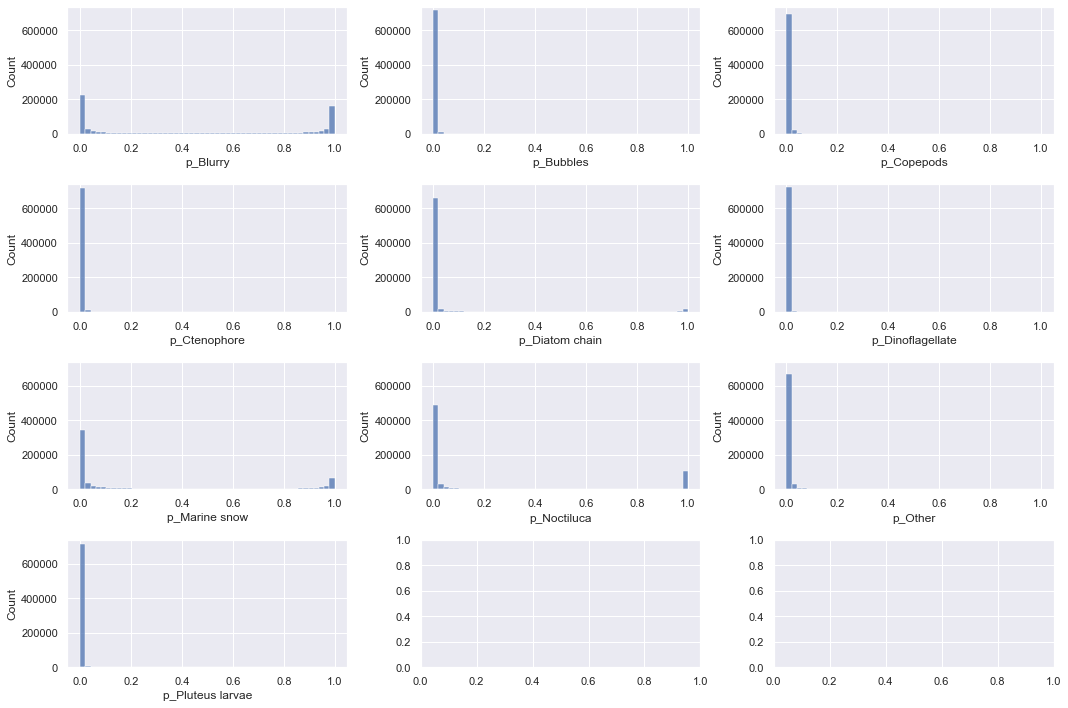

In [118]:
fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(15,10))

for ax, col in zip(axes.flatten(), p_cols):
    sns.histplot(data=df[col], bins=np.linspace(0,1,50), ax=ax)
    ax.set_ylim(0, len(df)+ 10000)
    
plt.tight_layout()
plt.show()

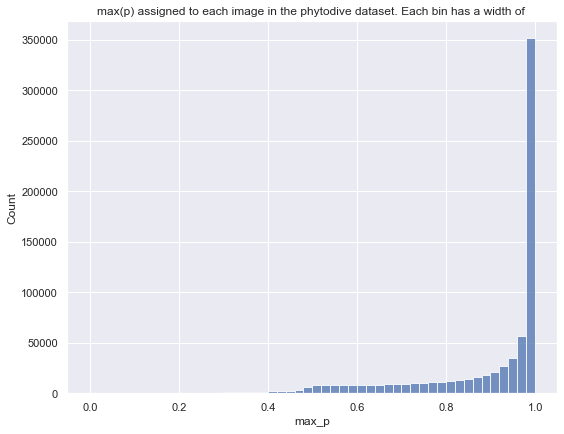

In [125]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=df["max_p"], ax=ax, bins=np.linspace(0,1,51))
plt.tight_layout()
ax.set_title("max(p) assigned to each image in the phytodive dataset.")
plt.show()

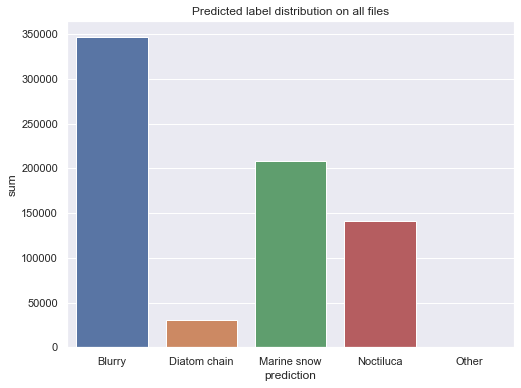

In [120]:
# lets have a look at the prediction distribution:
df_grouped = df.copy()
df_grouped["sum"] = 1
df_grouped = df_grouped.groupby("prediction")["sum"].sum().reset_index()

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title(f"Predicted label distribution on all files")
# ax.set_yscale("log")

sns.barplot(x="prediction", y="sum", data=df_grouped, ax=ax)
plt.show()

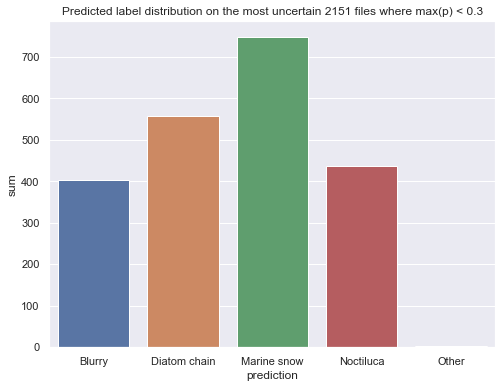

In [122]:
# lets have a look at the prediction distribution for files with small max_p

max_threshold = 0.3
df_grouped = df[df["max_p"] < max_threshold].copy()
df_grouped["sum"] = 1
df_grouped = df_grouped.groupby("prediction")["sum"].sum().reset_index()

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title(f"Predicted label distribution on the most uncertain {df_grouped['sum'].sum()} files where max(p) < {max_threshold}")
sns.barplot(x="prediction", y="sum", data=df_grouped, ax=ax)
plt.show()